In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def mostrar_imagen(imagen, titulo=''):
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.title(titulo)
    plt.axis('off')
    plt.show()

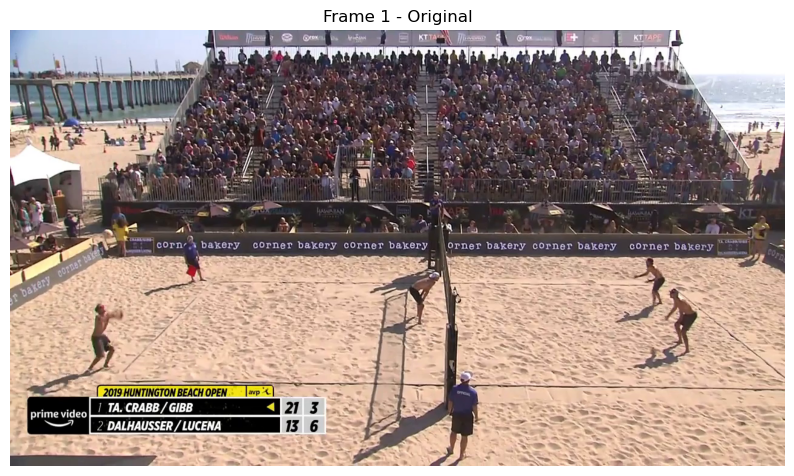

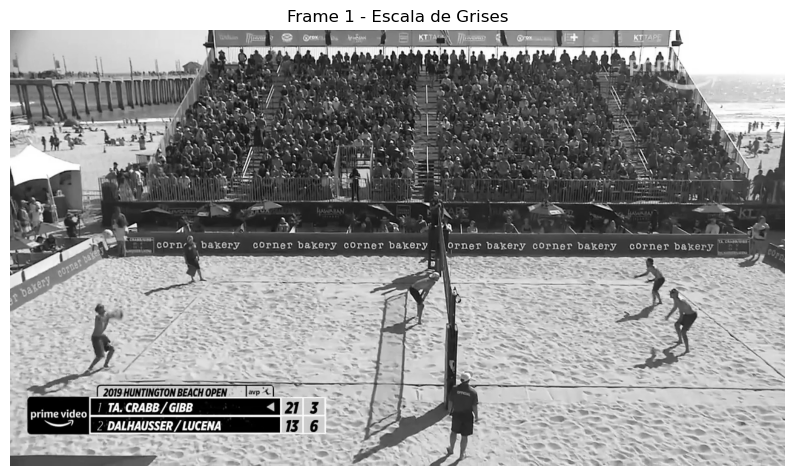

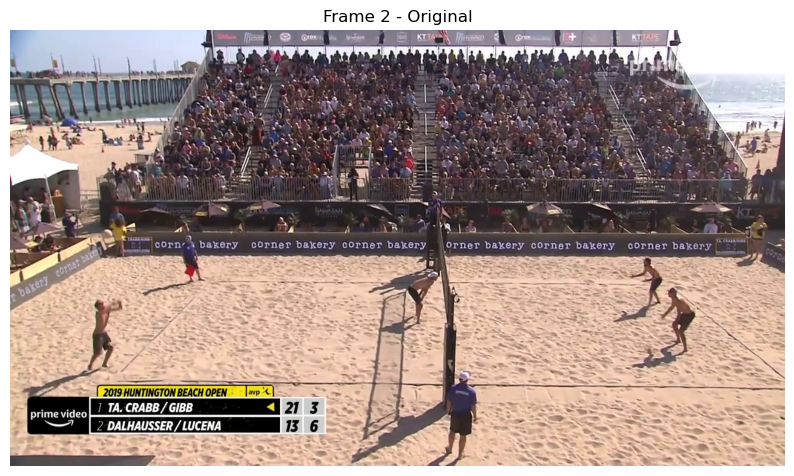

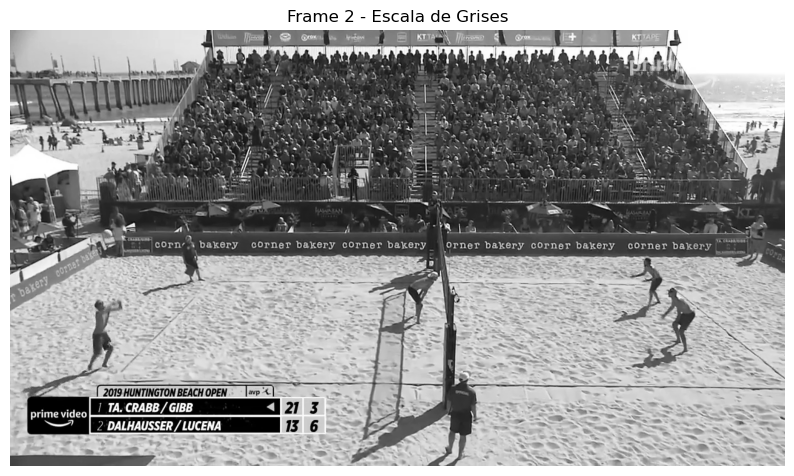

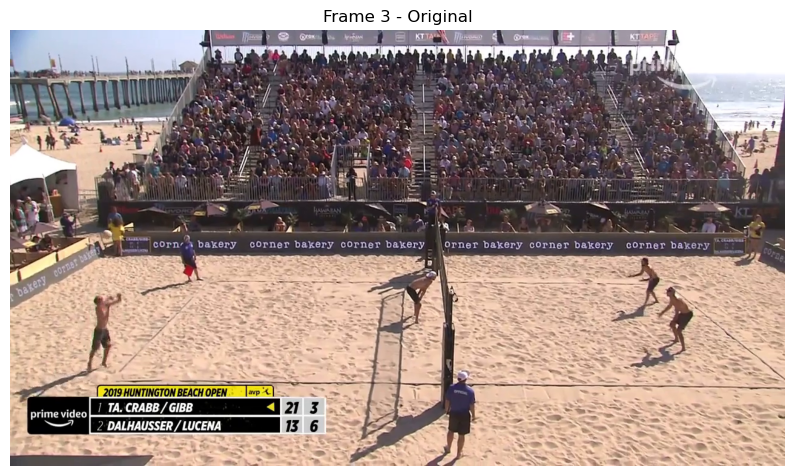

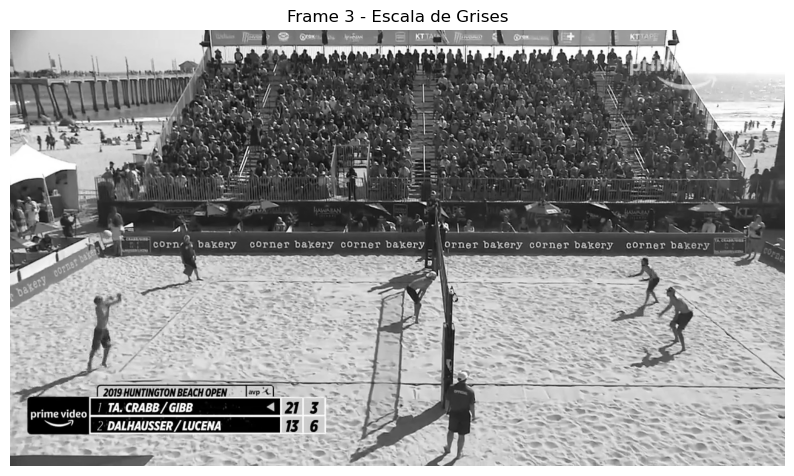

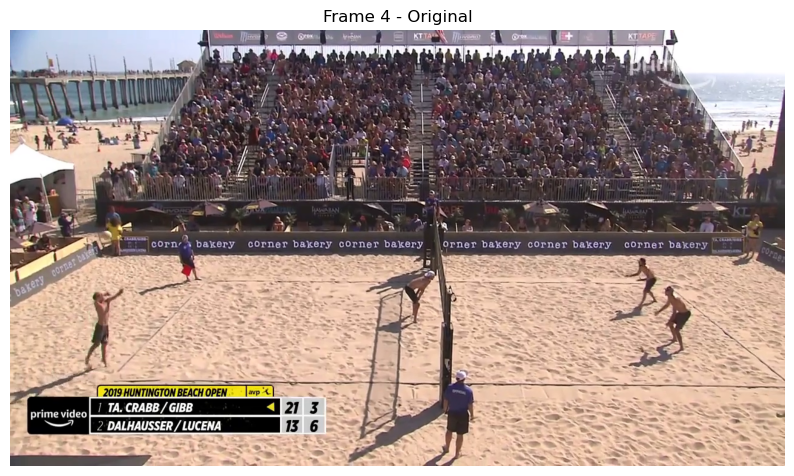

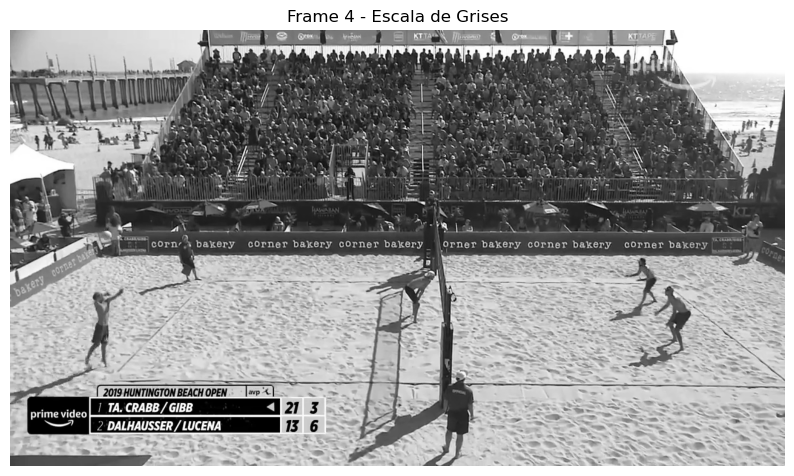

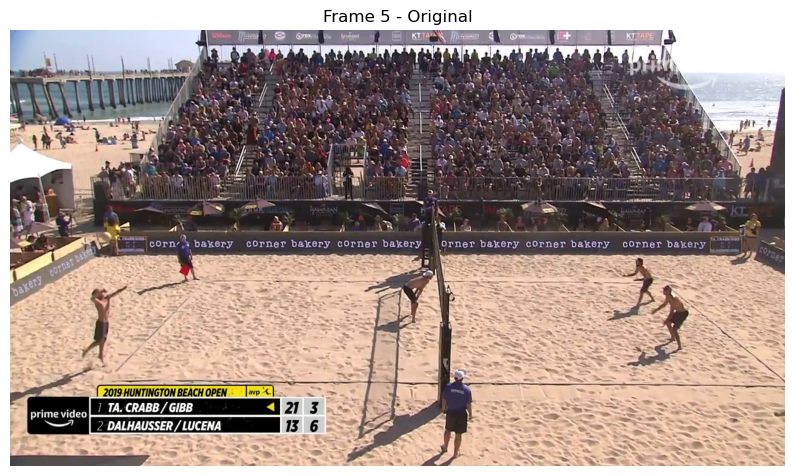

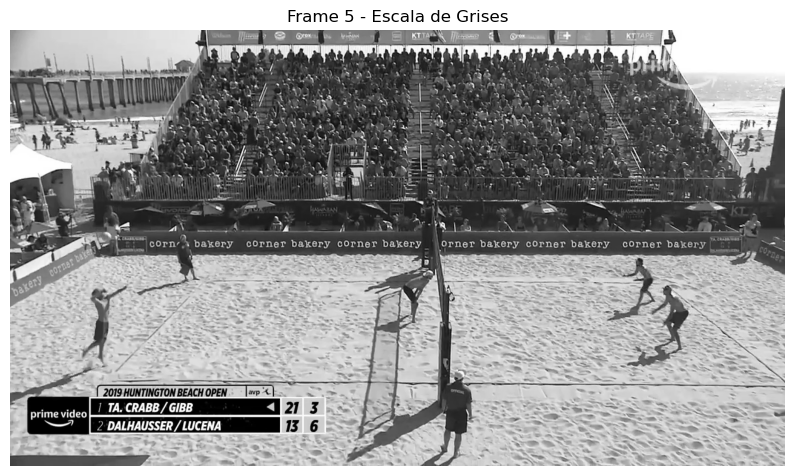

In [4]:
# Abre el video
video_path = 'bv2.mp4'
captura_video = cv2.VideoCapture(video_path)

if not captura_video.isOpened():
    print("Error al abrir el archivo de video")
else:
    # Lee los primeros 10 frames del video
    for i in range(5):
        ret, frame = captura_video.read()
        if ret:
            # Procesamiento básico: convertir a escala de grises
            frame_gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            # Mostrar el frame original y el frame en escala de grises
            mostrar_imagen(frame, titulo=f'Frame {i+1} - Original')
            mostrar_imagen(frame_gris, titulo=f'Frame {i+1} - Escala de Grises')
        else:
            break

# Libera el objeto de captura de video
captura_video.release()
cv2.destroyAllWindows()

In [5]:
# Abre el video
video_path = 'bv2.mp4'
captura_video = cv2.VideoCapture(video_path)

if not captura_video.isOpened():
    print("Error al abrir el archivo de video")
else:
    # Obtén las dimensiones del video
    frame_width = int(captura_video.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(captura_video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    # Nuevas dimensiones (mitad del tamaño original)
    new_width = frame_width // 2
    new_height = frame_height // 2
    
    # Obtén la tasa de cuadros (frame rate) del video
    fps = int(captura_video.get(cv2.CAP_PROP_FPS))
    fps = 35
    delay = int(1000 / fps)
    
    while True:
        ret, frame = captura_video.read()
        if not ret:
            break
        
        # Reducir el tamaño del frame
        frame_resized = cv2.resize(frame, (new_width, new_height))
        
        # Aplicar blur gaussiano al frame reducido
        frame_blur = cv2.GaussianBlur(frame_resized, (15, 15), 0)
        
        # Combina el frame original y el frame con blur lado a lado
        frame_combined = np.hstack((frame_resized, frame_blur))
        
        # Mostrar el frame combinado
        cv2.imshow('Video Original y Blur Gaussiano', frame_combined)
        
        # Salir del loop si se presiona la tecla 'q'
        if cv2.waitKey(delay) & 0xFF == ord('q'):
            break

# Libera el objeto de captura de video y cierra todas las ventanas
captura_video.release()
cv2.destroyAllWindows()

In [16]:
fps

29